<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/MLP_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/breastcancerdata.csv")


In [5]:
print(df.shape)

(569, 33)


In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df = df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


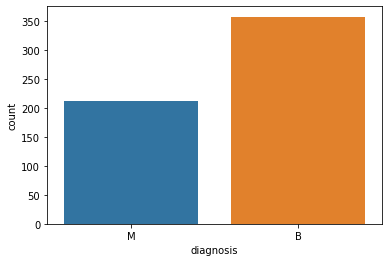

In [12]:
sns.countplot(df['diagnosis'], label = "Count")

In [117]:
train, test = train_test_split(df, test_size=0.35, random_state = 38)
print("Training Data :", train.shape)
print("Testing Data :", test.shape)

Training Data : (369, 32)
Testing Data : (200, 32)


In [118]:
train_id = train['id']
test_id = test['id']

train_df = train.iloc[:,1:]
test_df = test.iloc[:,1:]

print("Training Data :", train_df.shape)
print("Testing Data :", test_df.shape)

Training Data : (369, 31)
Testing Data : (200, 31)


In [119]:
train_df_x = train_df.iloc[:,1:]
train_df_x = MinMaxScaler().fit_transform(train_df_x)

test_df_x = test_df.iloc[:,1:]
test_df_x = MinMaxScaler().fit_transform(test_df_x)

print(train_df_x.shape)
print(test_df_x.shape)

(369, 30)
(200, 30)


In [120]:
train_df_y = train_df.iloc[:,:1]
train_df_y[train_df_y=='M'] = 0
train_df_y[train_df_y=='B'] = 1
train_df_y = train_df_y.astype('float32')


test_df_y = test_df.iloc[:,:1]
test_df_y[test_df_y=='M'] = 0
test_df_y[test_df_y=='B'] = 1
test_df_y = test_df_y.astype('float32')

print(train_df_y.shape)
print(test_df_y.shape)

(369, 1)
(200, 1)


In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(30,), bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='relu', bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='random_normal')
])

In [122]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
model.fit(train_df_x, train_df_y, epochs=75, batch_size=32)

Epoch 1/75
12/12 [==============================] - 1s 4ms/step - loss: 0.7201 - accuracy: 0.6287
Epoch 2/75
12/12 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.6287
Epoch 3/75
12/12 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.6287
Epoch 4/75
12/12 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.6287
Epoch 5/75
12/12 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.6287
Epoch 6/75
12/12 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.6287
Epoch 7/75
12/12 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.6287
Epoch 8/75
12/12 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.6287
Epoch 9/75
12/12 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.6287
Epoch 10/75
12/12 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.6287
Epoch 11/75
12/12 [

In [124]:
test_loss, test_acc = model.evaluate(test_df_x, test_df_y)

print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.9500
Test accuracy: 0.949999988079071
